In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

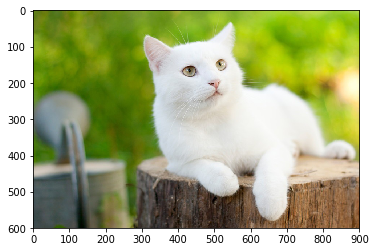

In [2]:
# 画像の表示

# 画像の読込み
img = cv2.imread('datasets/cat/1.jpg')

# BGRからRGBに変換して画像読込み
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# BGRからRGBに変換して画像読込み
plt.imshow(img)
plt.show()

In [12]:
def to_matplotlib_format(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

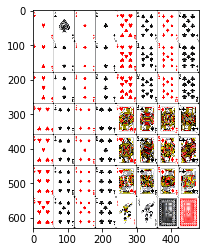

In [43]:
img = cv2.imread("datasets/cards/all.png")
temp = cv2.imread("datasets/cards/c01.png")

plt.imshow(to_matplotlib_format(img))
plt.show()

In [33]:
import cv2
#画像をグレースケールで読み込む
img = cv2.imread("datasets/cards/all.png", 0)
temp = cv2.imread("datasets/cards/c01.png", 0)

#マッチングテンプレートを実行
#比較方法はcv2.TM_CCOEFF_NORMEDを選択
result = cv2.matchTemplate(img, temp, cv2.TM_CCOEFF_NORMED)

#検出結果から検出領域の位置を取得
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
top_left = max_loc
w, h = temp.shape[::-1]
bottom_right = (top_left[0] + w, top_left[1] + h)


In [37]:
w, h

(200, 300)

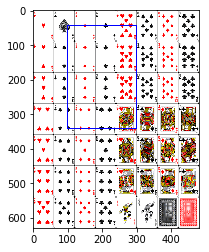

In [35]:
#検出領域を四角で囲んで保存
result_img = cv2.imread("datasets/cards/all.png")
cv2.rectangle(result_img, top_left, bottom_right, (255, 0, 0), 2)
cv2.imwrite("result.png", result_img)

plt.imshow(to_matplotlib_format(result_img))
plt.show()

In [53]:
top_left

(298, 179)

In [54]:
bottom_right

(1578, 819)

In [60]:
min_val, max_val, min_loc, max_loc

(-0.31717178225517273, 0.9962432384490967, (1092, 26), (298, 179))

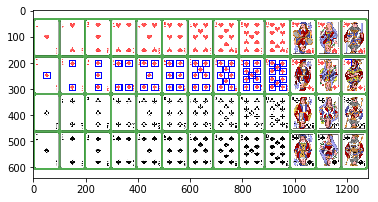

In [66]:
# -*- coding: utf-8 -*-
import cv2
import numpy as np

#画像をグレースケールで読み込む
img = cv2.imread("datasets/cards/1.png", 0)
temp = cv2.imread("datasets/cards/mark.png", 0)

#マッチングテンプレートを実行
result = cv2.matchTemplate(img, temp, cv2.TM_CCOEFF_NORMED)

#類似度の設定(0~1)
threshold = 0.9

#検出結果から検出領域の位置を取得
loc = np.where(result >= threshold)

#検出領域を四角で囲んで保存
result = cv2.imread("datasets/cards/1.png")
w, h = temp.shape[::-1]
for top_left in zip(*loc[::-1]):
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(result,top_left, bottom_right, (255, 0, 0), 2)
cv2.imwrite("result2.png", result)

plt.imshow(to_matplotlib_format(result))
plt.show()

In [89]:
for top_left in zip(*loc[::-1]):
    bottom_right = (top_left[0] + w, top_left[1] + h)
print(top_left, bottom_right)

(942, 283) (1039, 422)


In [96]:
img = cv2.rectangle(result,top_left, bottom_right, (255, 0, 0), 2)
plt.imshow(to_matplotlib_format(img))
plt.show()

error: /tmp/opencv-20171112-69002-161xh9l/opencv-3.3.1/modules/imgproc/src/color.cpp:11016: error: (-215) scn == 3 || scn == 4 in function cvtColor
